In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from math import pi
from matplotlib.projections import register_projection

warnings.filterwarnings('ignore')

In [2]:
df_au = pd.read_csv('multiTimeline (3).csv', header=1)

In [3]:
df_us = pd.read_csv('multiTimeline (5).csv', header=1)
df_us.head()

,Week,Climate change: (United States)
0,2015-10-04,24
1,2015-10-11,25
2,2015-10-18,26
3,2015-10-25,27
4,2015-11-01,31


In [4]:
df_us.columns = ['Week', 'US']
df_au.columns = ['Week', 'AU']

In [5]:
df_us['Week'] = pd.to_datetime(df_us['Week'])
df_au['Week'] = pd.to_datetime(df_au['Week'])

In [6]:
df_us['Month'] = df_us['Week'].dt.month
df_us['Year'] = df_us['Week'].dt.year

df_au['Month'] = df_au['Week'].dt.month
df_au['Year'] = df_au['Week'].dt.year

In [7]:
df_us = df_us.groupby(['Month', 'Year'], as_index=False).mean()
df_au = df_au.groupby(['Month', 'Year'], as_index=False).mean()

In [8]:
df_us['US'] = round(df_us['US'], 0).astype('int')
df_au['AU'] = round(df_au['AU'], 0).astype('int')

In [9]:
df_us['season_US'] = np.where(df_us['Month'].isin([12, 1, 2]), 'winter',
                          np.where(df_us['Month'].isin([3,4,5]), 'spring', 
                                  np.where(df_us['Month'].isin([6,7,8]), 'summer', 'fall')))
df_au['season_AU'] = np.where(df_au['Month'].isin([12, 1, 2]), 'winter',
                          np.where(df_au['Month'].isin([3,4,5]), 'spring', 
                                  np.where(df_au['Month'].isin([6,7,8]), 'summer', 'fall')))

In [10]:
pivoted_us = df_us.pivot_table(index=['Month', 'season_US'], columns='Year', values='US').reset_index()
pivoted_au = df_au.pivot_table(index=['Month', 'season_AU'], columns='Year', values='AU').reset_index()

In [11]:
pivoted_us

Year,Month,season_US,2015,2016,2017,2018,2019,2020
0,1,winter,NaN,22.0,32.0,23.0,30.0,33.0
1,2,winter,NaN,25.0,31.0,22.0,34.0,32.0
2,3,spring,NaN,26.0,31.0,21.0,33.0,24.0
3,4,spring,NaN,31.0,34.0,26.0,38.0,25.0
4,5,spring,NaN,25.0,47.0,23.0,38.0,20.0
5,6,summer,NaN,12.0,23.0,11.0,22.0,10.0
6,7,summer,NaN,11.0,15.0,10.0,18.0,10.0
7,8,summer,NaN,12.0,16.0,13.0,22.0,12.0
8,9,fall,NaN,21.0,32.0,18.0,49.0,38.0
9,10,fall,26.0,26.0,23.0,33.0,32.0,NaN


In [12]:
line_colors = ['#e74a5e', '#e01e37', '#c71f37', '#a71e34', '#85182a', '#641220']
season_colors = ['#C9F1FD', '#f2d78a', '#fb5c4b', '#64bcbc']

In [13]:
np.arange(0, 13, 2)

array([ 0,  2,  4,  6,  8, 10, 12])

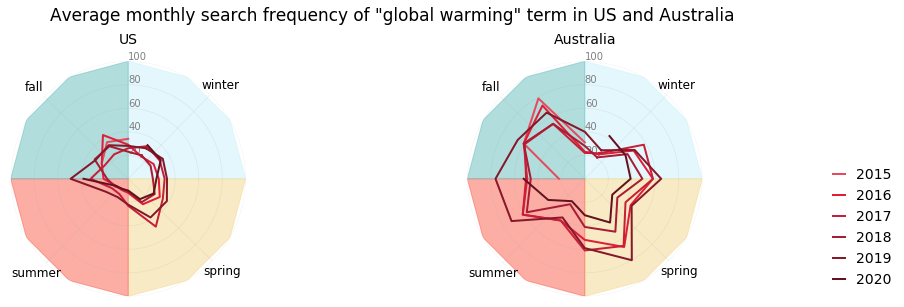

In [28]:
# number of variable
categories=list(pivoted_us['Month'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
fig, axes = plt.subplots(subplot_kw=dict(polar=True), ncols=2, nrows=1, figsize=(15, 4))

# If you want the first axis to be on top:
axes[0].set_theta_offset(pi / 3)
axes[0].set_theta_direction(-1)


# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# draw background with seasons
values = [100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100]
values += values[:1]
axes[0].fill(angles, values, color='#C9F1FD', alpha=0.5)

values = [0, 0, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0]
values += values[:1]
axes[0].fill(angles, values, color='#f2d78a', alpha=0.5);

values = [0, 0, 0, 0, 0, 100, 100, 100, 100, 0, 0, 0]
values += values[:1]
axes[0].fill(angles, values, color='#fb5c4b', alpha=0.5);

values = [0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100]
values += values[:1]
axes[0].fill(angles, values, color='#64bcbc', alpha=0.5);
axes[0].patch.set_alpha(0)
axes[0].spines["polar"].set_visible(False)

i = 0
for year in pivoted_us.columns[2:]:
    values = pivoted_us[year].values.flatten().tolist()
    values += values[:1]
    axes[0].plot(angles, values, linewidth=2, linestyle='solid', label=year, color=line_colors[i])
    i += 1
axes[0].grid(alpha=0.2)
axes[0].set_title('US', fontsize=14)

# first axis to be on top:
axes[1].set_theta_offset(pi / 3)
axes[1].set_theta_direction(-1)


# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# draw background with seasons
values = [100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100]
values += values[:1]
axes[1].fill(angles, values, color='#C9F1FD', alpha=0.5)

values = [0, 0, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0]
values += values[:1]
axes[1].fill(angles, values, color='#f2d78a', alpha=0.5);

values = [0, 0, 0, 0, 0, 100, 100, 100, 100, 0, 0, 0]
values += values[:1]
axes[1].fill(angles, values, color='#fb5c4b', alpha=0.5);

values = [0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100]
values += values[:1]
axes[1].fill(angles, values, color='#64bcbc', alpha=0.5);
axes[1].patch.set_alpha(0)
axes[1].spines["polar"].set_visible(False)


# Draw labels
axes[1].set_rlabel_position(330)
axes[0].set_rlabel_position(330)
ylabels = axes[1].get_yticks()
ylabels = [int(y) for y in ylabels]
axes[1].set_yticklabels(ylabels, color="grey")
axes[1].set_ylim(0,100)
axes[0].set_yticklabels(ylabels, color="grey")
axes[0].set_ylim(0,100)

xlabels = axes[1].get_xticks()
axes[1].set_xticks(xlabels[::3]+0.25)
axes[1].set_xticklabels(['winter', 'spring', 'summer', 'fall'], fontdict={'fontsize':12})
axes[0].set_xticks(xlabels[::3]+0.25)
axes[0].set_xticklabels(['winter', 'spring', 'summer', 'fall'], fontdict={'fontsize':12})

i = 0
for year in pivoted_us.columns[2:]:
    values = pivoted_au[year].values.flatten().tolist()
    values += values[:1]
    axes[1].plot(angles, values, linewidth=2, linestyle='solid', label=year, color=line_colors[i])
    axes[1].fill(angles, values, alpha=0)
    i += 1
axes[1].grid(alpha=0.2)
axes[1].set_title('Australia', fontsize=14)
plt.tight_layout()
axes[0].text(s='Average monthly search frequency of "global warming" term in US and Australia', x=200.08, y=150,
            fontsize=17)
axes[0].legend(bbox_to_anchor=(3.8, 0.6), frameon=False, handlelength=0.8, fontsize=14);
